# Problem statement 4:
- Implement surge pricing prediction logic

In [1]:
import numpy as np

In [2]:
import pandas as pd


demand_matrix = pd.read_csv(r"demand_matrix_for_demand_prediction_with_timestamp.csv")
adj_matrix    = pd.read_csv(r"adj_matrix_for_demand_prediction_final.csv")

In [3]:
print(demand_matrix.shape)  # should be (778, 263)
print(adj_matrix.shape) 

(778, 264)
(263, 263)


In [4]:
demand_matrix

,time_slot,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,2024-12-25 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-12-29 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,2025-02-04 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
774,2025-02-05 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
775,2025-02-05 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,2025-02-05 17:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
weather = pd.read_csv(r"C:\Users\Dell\Downloads\weather_data_dec2024_feb2025_NYC.csv")

In [6]:
weather

,timestamp,avg_temp_c,feels_like_c,dew_point_c,rel_humidity_pct,cloud_cover_pct,visibility_km,precip_mm,snowfall_cm,wind_speed_kmh,wind_gust_kmh,sea_level_pressure_mb
0,2024-12-01 00:00:00,5.91,6.20,4.63,61.8,77.0,12.1,0.00,0.0,10.6,15.9,1010.5
1,2024-12-01 01:00:00,1.87,2.79,-0.23,55.1,98.3,10.3,0.00,0.0,15.8,21.4,1028.8
2,2024-12-01 02:00:00,7.23,4.78,6.73,59.9,40.4,10.4,0.00,0.0,21.8,31.8,1020.4
3,2024-12-01 03:00:00,7.79,6.34,5.68,90.9,9.1,10.3,0.00,0.0,22.2,28.6,1016.1
4,2024-12-01 04:00:00,-0.89,-2.30,-1.96,74.9,67.5,10.6,0.00,0.0,8.3,14.9,1029.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2025-02-28 19:00:00,5.79,5.37,4.66,68.4,24.1,8.7,0.17,0.0,15.2,21.6,1021.0
2156,2025-02-28 20:00:00,4.99,3.57,3.03,68.3,45.5,15.4,0.00,0.0,11.2,19.2,1001.8
2157,2025-02-28 21:00:00,1.56,1.88,1.67,74.9,31.8,11.5,0.00,0.0,15.3,26.9,1009.4
2158,2025-02-28 22:00:00,6.03,6.95,4.57,68.8,29.1,11.6,0.00,0.0,7.3,14.5,1021.0


## 1.setting timeslot as index

In [7]:

demand_matrix['time_slot'] = pd.to_datetime(demand_matrix['time_slot'])
demand_matrix = demand_matrix.set_index('time_slot').sort_index()

print(demand_matrix.index.min(), demand_matrix.index.max())
print(demand_matrix.shape)   # should be (778, 263)

2024-12-25 23:00:00 2025-02-05 18:00:00
(778, 263)


## 2.Aligning weather with demand Matrix

In [8]:

weather['timestamp'] = pd.to_datetime(weather['timestamp'])
weather = weather.set_index('timestamp').sort_index()


weather_features = [
    'avg_temp_c',
    'feels_like_c',
    'dew_point_c',
    'rel_humidity_pct',
    'cloud_cover_pct',
    'visibility_km',
    'precip_mm',
    'snowfall_cm',
    'wind_speed_kmh',
    'wind_gust_kmh',
    'sea_level_pressure_mb'
]

weather = weather[weather_features]


weather_aligned = weather.reindex(demand_matrix.index)

print(weather_aligned.shape)   


(778, 11)


In [9]:
weather_aligned

,avg_temp_c,feels_like_c,dew_point_c,rel_humidity_pct,cloud_cover_pct,visibility_km,precip_mm,snowfall_cm,wind_speed_kmh,wind_gust_kmh,sea_level_pressure_mb
time_slot,,,,,,,,,,,
2024-12-25 23:00:00,-6.16,-7.96,-9.13,70.0,59.3,12.5,0.00,0.0,22.3,30.2,998.4
2024-12-29 01:00:00,-5.50,-4.51,-6.83,67.0,49.0,11.5,0.00,0.0,9.0,17.1,998.2
2024-12-31 19:00:00,-8.66,-10.38,-10.70,51.9,61.3,16.5,0.00,0.0,8.8,8.8,1000.6
2024-12-31 20:00:00,1.09,1.43,0.14,74.8,76.7,17.5,0.00,0.0,16.7,20.3,999.2
2024-12-31 21:00:00,1.65,3.26,-1.15,64.0,68.5,15.0,0.00,0.0,22.2,28.2,1025.7
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-04 21:00:00,1.13,1.77,-0.54,50.7,55.2,10.1,1.58,0.0,10.4,14.7,1011.3
2025-02-05 14:00:00,6.39,5.30,3.94,74.3,68.2,10.8,0.00,0.0,2.0,9.4,1005.6
2025-02-05 15:00:00,-1.54,0.64,-3.25,100.0,73.7,12.3,5.03,0.0,12.2,20.2,1038.5


## 3.Converting to numpy arrays for the model

In [10]:

demand_np = demand_matrix.values.astype('float32')         
T, num_zones = demand_np.shape


weather_np = weather_aligned.values.astype('float32')       
num_weather = weather_np.shape[1]

print(T, num_zones, num_weather)


778 263 11


## 4.Normalized Adjancency Matrix

In [11]:
import numpy as np

A = adj_matrix.values.astype("float32")


A_tilde = A + np.eye(A.shape[0], dtype="float32")


deg = A_tilde.sum(axis=1)  


deg_inv_sqrt = np.power(deg, -0.5)
deg_inv_sqrt[np.isinf(deg_inv_sqrt)] = 0.0

D_inv_sqrt = np.diag(deg_inv_sqrt)


A_hat = D_inv_sqrt @ A_tilde @ D_inv_sqrt   # shape (263, 263)

print(A_hat.shape)


(263, 263)


In [12]:
A_hat

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## 5.Build X, y with demand + adjacency + weather

In [13]:
past_steps = 6

X_list = []
y_list = []

for t in range(past_steps, T):
   
    demand_window = demand_np[t-past_steps:t, :]            

    
    neighbor_window = (A_hat @ demand_window.T).T          

    
    weather_window = weather_np[t-past_steps:t, :]         

    
    X_window = np.concatenate(
        [demand_window, neighbor_window, weather_window],
        axis=1                                             
    )

    X_list.append(X_window)
    y_list.append(demand_np[t, :])                         

X = np.stack(X_list, axis=0)   
y = np.stack(y_list, axis=0)   

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (772, 6, 537)
y shape: (772, 263)


## 6.Building the WEATHER-ENHANCED GCN-LSTM MODEL

In [14]:
from tensorflow.keras import layers, models

past_steps = 6
feature_dim = X.shape[2]   
num_zones = y.shape[1]     

inputs = layers.Input(shape=(past_steps, feature_dim))


x = layers.LSTM(128, return_sequences=True)(inputs)
x = layers.LSTM(64, return_sequences=False)(x)


x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)


outputs = layers.Dense(num_zones)(x)

graph_weather_lstm_model = models.Model(inputs, outputs)
graph_weather_lstm_model.compile(optimizer='adam', loss='mse',metrics=["mae"])

graph_weather_lstm_model.summary()






Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 537)]          0         
                                                                 
 lstm (LSTM)                 (None, 6, 128)            340992    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 263)               17095     
                                                                 
Total params: 424071 (1.62 MB)
Trainable params: 424071 (1

## 7.Training the WEATHER-ENHANCED GCN-LSTM MODEL

In [15]:


history = graph_weather_lstm_model.fit(
    X, y,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/50


20/20 [==============================] - 13s 145ms/step - loss: 40418.9336 - mae: 123.0283 - val_loss: 33048.8516 - val_mae: 101.3031
Epoch 2/50
20/20 [==============================] - 1s 29ms/step - loss: 38509.0820 - mae: 116.4314 - val_loss: 29567.7383 - val_mae: 92.5292
Epoch 3/50
20/20 [==============================] - 1s 29ms/step - loss: 31261.3809 - mae: 94.7882 - val_loss: 21727.2734 - val_mae: 78.6395
Epoch 4/50
20/20 [==============================] - 1s 28ms/step - loss: 20738.4375 - mae: 73.1908 - val_loss: 16767.5879 - val_mae: 75.5124
Epoch 5/50
20/20 [==============================] - 1s 28ms/step - loss: 14548.5068 - mae: 62.4251 - val_loss: 15058.6416 - val_mae: 70.0227
Epoch 6/50
20/20 [==============================] - 1s 27ms/step - loss: 12410.1514 - mae: 57.7368 - val_loss: 14280.8262 - val_mae: 68.2897
Epoch 7/50
20/20 [==============================] - 1s 29ms/step - loss: 11729.4150 - mae: 56.8145 - val_loss: 14045.1162 - val_mae: 68.0621
Epoch 

### 8.loss vs val loss plots

In [17]:
import matplotlib.pyplot as plt

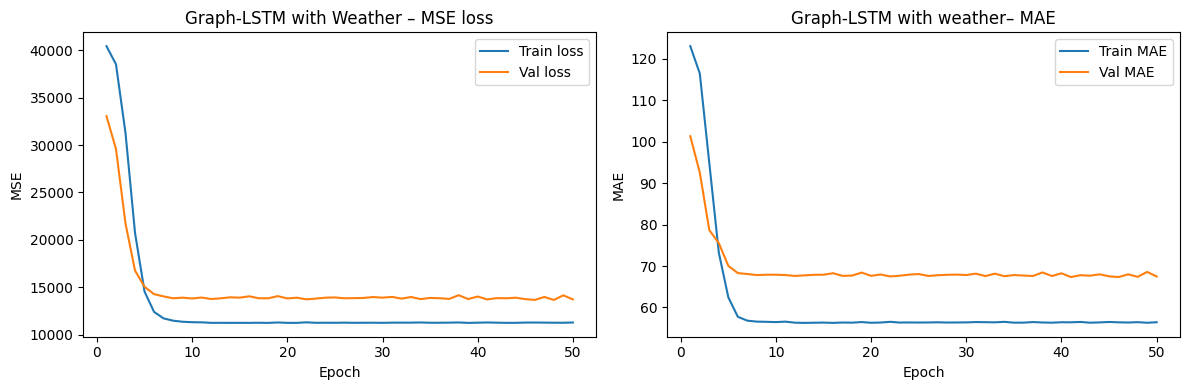

In [18]:
hist_g = history.history
epochs_g = range(1, len(hist_g["loss"]) + 1)

plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(epochs_g, hist_g["loss"], label="Train loss")
plt.plot(epochs_g, hist_g["val_loss"], label="Val loss")
plt.title("Graph-LSTM with Weather – MSE loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()

# MAE
plt.subplot(1,2,2)
plt.plot(epochs_g, hist_g["mae"], label="Train MAE")
plt.plot(epochs_g, hist_g["val_mae"], label="Val MAE")
plt.title("Graph-LSTM with weather– MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()

plt.tight_layout()
plt.show()


## 9.Predicting using the Model

In [19]:
recent_demand = demand_matrix.iloc[-6:].values.astype("float32")
recent_neighbor = (A_hat @ recent_demand.T).T
recent_weather = weather_aligned.iloc[-6:].values.astype("float32")

X_future = np.concatenate(
    [recent_demand, recent_neighbor, recent_weather],
    axis=1
).reshape(1, 6, X.shape[2])

pred = graph_weather_lstm_model.predict(X_future)[0]

print(pred[:10])   



1/1 [==============================] - 2s 2s/step
[2.9395943e+00 4.9677912e-02 6.0744152e+01 9.3424728e+01 9.9968204e+00
 1.9269817e+01 2.6869904e+02 1.3811477e+00 2.6384285e+01 8.8578300e+01]


In [20]:
def describe_demand(zone_id, demand):
    # Clip negatives to 0
    demand = max(0, float(demand))

    # Categorize demand level
    if demand >= 300:
        level = "a very high-demand zone"
    elif demand >= 100:
        level = "a high-demand zone"
    elif demand >= 30:
        level = "a moderate-demand zone"
    elif demand >= 10:
        level = "a low-to-moderate demand zone"
    else:
        level = "a low-demand zone"

    demand_int = round(demand)

    return f"Zone {zone_id} is {level}, with approximately {demand_int} taxi pickups expected in the next hour."


In [21]:


def show_zone_demand(zone_ids, predictions):
   
    
    preds = np.asarray(predictions).astype(float)
    n_zones = preds.shape[0]

    
    if isinstance(zone_ids, (int, str)):
        zone_ids = [zone_ids]

   
    for zid in zone_ids:
        zid_int = int(zid)

        
        if zid_int < 1 or zid_int > n_zones:
            print(f"Zone {zid_int} is out of range. Valid zone IDs: 1 to {n_zones}.")
            continue

        demand = preds[zid_int - 1]  
        print(describe_demand(zid_int, demand))


In [22]:


show_zone_demand(1, pred)           
print("-------------------------------------------")
show_zone_demand([ 3, 7, 10], pred)  
print("-------------------------------------------")
show_zone_demand(range(25, 36), pred)   


Zone 1 is a low-demand zone, with approximately 3 taxi pickups expected in the next hour.
-------------------------------------------
Zone 3 is a moderate-demand zone, with approximately 61 taxi pickups expected in the next hour.
Zone 7 is a high-demand zone, with approximately 269 taxi pickups expected in the next hour.
Zone 10 is a moderate-demand zone, with approximately 89 taxi pickups expected in the next hour.
-------------------------------------------
Zone 25 is a high-demand zone, with approximately 161 taxi pickups expected in the next hour.
Zone 26 is a high-demand zone, with approximately 161 taxi pickups expected in the next hour.
Zone 27 is a low-demand zone, with approximately 1 taxi pickups expected in the next hour.
Zone 28 is a moderate-demand zone, with approximately 68 taxi pickups expected in the next hour.
Zone 29 is a moderate-demand zone, with approximately 58 taxi pickups expected in the next hour.
Zone 30 is a low-demand zone, with approximately 2 taxi pickups

# Implementing Surge Pricing Prediction Logic

In [24]:
baseline_demand = demand_matrix.median(axis=0).values.astype("float32")  
min_baseline = 3.0   
baseline_demand_safe = np.maximum(baseline_demand, min_baseline)

In [25]:
predicted_demand = np.asarray(pred, dtype="float32")
predicted_demand = np.clip(predicted_demand, 0, None)   

predicted_demand_rounded = np.round(predicted_demand).astype(int)

print("First 10 predicted demands (rounded):")
print(predicted_demand_rounded[:10])

First 10 predicted demands (rounded):
[  3   0  61  93  10  19 269   1  26  89]


In [26]:
predicted_demand = predicted_demand.flatten()
n_zones = predicted_demand.shape[0]
print("Predicted demand shape:", predicted_demand.shape)

Predicted demand shape: (263,)


In [27]:

def compute_surge(predicted_demand, baseline_demand_safe, eps=1e-3):

    pred = np.asarray(predicted_demand, dtype=float)
    base = np.asarray(baseline_demand_safe, dtype=float)

    if pred.shape != base.shape:
        raise ValueError(f"Shape mismatch: pred {pred.shape}, baseline {base.shape}")

   
    load_index = pred / (base + eps)

    
    surge = np.ones_like(load_index)

    surge[load_index > 1.05] = 1.2   
    surge[load_index > 1.15] = 1.5   
    surge[load_index > 1.30] = 2.0  
    surge[load_index > 1.50] = 2.5  

    return load_index, surge


In [28]:
load_index, surge_multiplier = compute_surge(predicted_demand, baseline_demand_safe)

print("Load index stats:")
print("  min:", load_index.min())
print("  max:", load_index.max())
print("  mean:", load_index.mean())
print("  zones with surge > 1.0x:", (surge_multiplier > 1.0).sum())


Load index stats:
  min: 0.0
  max: 1.5168859537395556
  mean: 0.9930617152073055
  zones with surge > 1.0x: 70


In [29]:

zone_ids = demand_matrix.columns  

surge_df = pd.DataFrame({
    "zone_id": zone_ids,
    "predicted_demand_next_hour": predicted_demand,
    "predicted_demand_rounded": predicted_demand_rounded,
    "baseline_demand": baseline_demand_safe,
    "load_index": load_index,
    "surge_multiplier": surge_multiplier
})


surge_df["zone_id"] = pd.to_numeric(surge_df["zone_id"], errors="coerce").astype("Int64")


surge_df_sorted = surge_df.sort_values(
    ["surge_multiplier", "load_index"],
    ascending=False
).reset_index(drop=True)

print("Unique surge multipliers:", surge_df_sorted["surge_multiplier"].unique())

Unique surge multipliers: [2.5 2.  1.5 1.2 1. ]


In [30]:
surge_df_sorted

,zone_id,predicted_demand_next_hour,predicted_demand_rounded,baseline_demand,load_index,surge_multiplier
0,148,320.064453,320,211.0,1.516886,2.5
1,93,10.581525,11,7.0,1.511430,2.5
2,114,239.723068,240,161.5,1.484344,2.0
3,79,457.356415,457,320.0,1.429234,2.0
4,34,24.495514,24,17.5,1.399664,2.0
...,...,...,...,...,...,...
258,99,0.000395,0,3.0,0.000132,1.0
259,103,0.000000,0,3.0,0.000000,1.0
260,105,0.000000,0,3.0,0.000000,1.0
261,110,0.000000,0,3.0,0.000000,1.0


In [31]:

def get_surge_multiplier_for_zone(zone_id, surge_df_sorted):
   
    zid = int(zone_id)

    
    surge_df_sorted = surge_df_sorted.copy()
    surge_df_sorted["zone_id"] = surge_df_sorted["zone_id"].astype("Int64")

    row = surge_df_sorted[surge_df_sorted["zone_id"] == zid]

    if row.empty:
       
        print("Sample available zone IDs:", surge_df_sorted["zone_id"].dropna().unique()[:20])
        raise ValueError(f"Zone {zid} not found in surge_df_sorted.")

    return float(row["surge_multiplier"].iloc[0])


def compute_surge_price(zone_id, base_fare, surge_df_sorted):
   
    base_fare = float(base_fare)

   
    surge_mult = get_surge_multiplier_for_zone(zone_id, surge_df_sorted)

    
    surged_price = base_fare * surge_mult

    return surge_mult, surged_price




In [32]:

zone_id = 46
user_base_fare = 12.50  

surge_mult, surged_price = compute_surge_price(zone_id, user_base_fare, surge_df_sorted)

print(f"Zone {zone_id}:")
print(f"  User base fare (no surge): ${user_base_fare:.2f}")
print(f"  Surge multiplier from model: {surge_mult:.1f}x")
print(f"  Final surged fare: ${surged_price:.2f}")



Zone 46:
  User base fare (no surge): $12.50
  Surge multiplier from model: 2.0x
  Final surged fare: $25.00
